# Build your own CNN
- Recap

- Data prep

- Building a first CNN
    - Demo
    - Your turn

- Dropout
    - Demo
    - Your turn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import random as rn

seed = 42
np.random.seed(seed)
rn.seed(seed)
tf.set_random_seed(seed)

### Data ingestion and formatting

In [3]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2,random_state=seed)

In [4]:
X_train.shape

(48000, 28, 28)

### reshape data to fit model

In [5]:
# the models expects information about the channels used
# reshape data to fit model
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [6]:
X_train.shape

(48000, 28, 28, 1)

### EDA

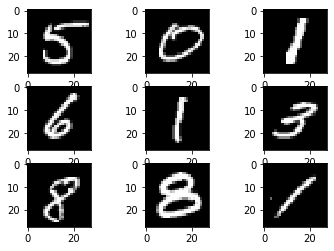

In [7]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
y_train[:10]

array([5, 0, 1, 6, 1, 3, 8, 8, 1, 8], dtype=uint8)

### one-hot encode target column

In [9]:
from keras.utils import to_categorical

# one-hot encode target column
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(48000, 10)

In [11]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

# CNNs best practices

## Convolutional layers
Use small kernels/filters:
 - 3x3 or 5x5<br>
 
Use small strides:
 
 - 1 or 2 respectively for the above kernels
 - In general: Strides = (Kernel size -1)/2
 
 #### Discuss:
 How does the shape of our data change after applying a 3x3 convolutional layer with stride 1?
 
 
## Pooling layers
Downsampling of Convolutional output<br>

Use small kernels/filters:
 - 2x2
 - Sometimes you may want to use 3x3 but larger tends to reduce performance heavily<br>
 
Use small strides:
 
 - 2
 - Very rarely 3
 
 #### Discuss:
 By how much do we reduce our data size when we perform a 2x2 pooling of stride 2?


## Flattening layers
- Transform multidimensional data into in the NN into an array that can be used by a Dense Layer
- The nexus between your non-fully-connected and fully-connected layers

# Demo

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout

In [17]:
# Intitialise your NN
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(32,kernel_size=(3,3),strides=1,input_shape=(28,28,1),activation='relu'))
# Add a pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2))
# Add a flattening layer
model.add(Flatten())
# Add a dense layer suitable for our problem
model.add(Dense(10,activation='softmax'))
# Compile your CNN
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
# Show summary and compare with your partner
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Fit / Validate your model (Keep Epochs to 5 for our example)
history = model.fit(X_train,y_train,batch_size=1000,epochs=5,validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 180us/step - loss: 6.0578 - acc: 0.6065 - val_loss: 5.1823 - val_acc: 0.6692
Epoch 2/5
48000/48000 [==============================] - 9s 183us/step - loss: 5.0166 - acc: 0.6819 - val_loss: 5.0119 - val_acc: 0.6818
Epoch 3/5
48000/48000 [==============================] - 9s 195us/step - loss: 4.8877 - acc: 0.6910 - val_loss: 4.9254 - val_acc: 0.6893
Epoch 4/5
48000/48000 [==============================] - 8s 174us/step - loss: 4.7940 - acc: 0.6977 - val_loss: 4.8811 - val_acc: 0.6906
Epoch 5/5
48000/48000 [==============================] - 8s 168us/step - loss: 4.7634 - acc: 0.6996 - val_loss: 4.9207 - val_acc: 0.6860


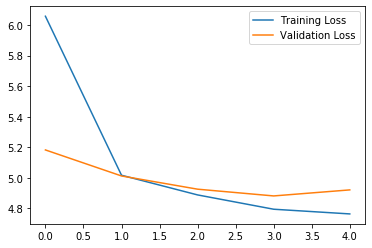

In [21]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Wait what?!!

# [But mum... Why is the training loss higher than the validation loss???!!!](https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss)

# Looking at outputs

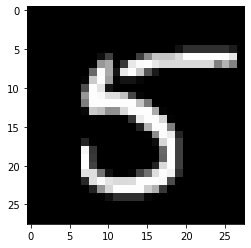

In [22]:
plt.imshow(X_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))

In [23]:
model.predict(X_train[:1])

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.9195154e-35,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [24]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_1').output)
intermediate_output = intermediate_layer_model.predict(X_train)

In [25]:
intermediate_output[0].shape

(13, 13, 32)

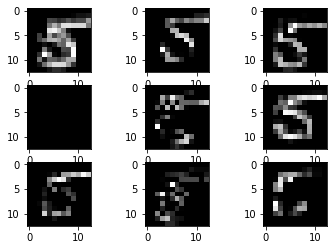

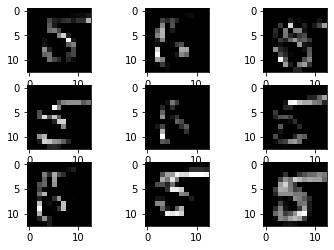

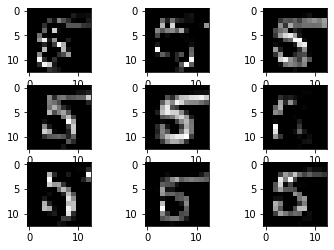

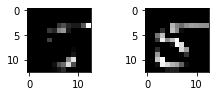

In [26]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(10,19):
    plt.subplot(330 + 1 + i-10)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(20,29):
    plt.subplot(330 + 1 + i-20)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(30,32):
    plt.subplot(330 + 1 + i-30)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()

## 1 Convolutional layer + 1 Pooling layer

In [21]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3,strides=1, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 47us/step - loss: 5.2952 - accuracy: 0.7928 - val_loss: 0.9899 - val_accuracy: 0.9329
Epoch 2/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.5934 - accuracy: 0.9462 - val_loss: 0.3594 - val_accuracy: 0.9587
Epoch 3/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.2344 - accuracy: 0.9659 - val_loss: 0.2511 - val_accuracy: 0.9639
Epoch 4/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.1352 - accuracy: 0.9755 - val_loss: 0.1955 - val_accuracy: 0.9694
Epoch 5/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.0898 - accuracy: 0.9806 - val_loss: 0.1786 - val_accuracy: 0.9686


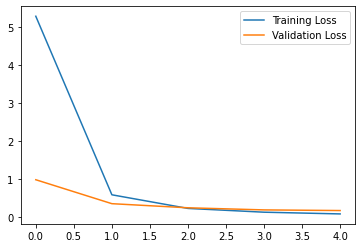

In [23]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Now build your CNN

#### Person A:
Output layer one 64 neurons, kernel 3x3<br>
Layer two kernel 2x2
#### Person B:
Output layer one 64 neurons, kernel 5x5<br>
Layer two kernel 2x2

In [25]:
# Intitialise your NN
# Add a convolutional layer
# Add a pooling layer
# Add a flattening layer
# Add a dense layer suitable for our problem
# Compile your CNN
# Show summary and compare with your partner

In [26]:
# Fit / Validate your model (Keep Epochs to 5 for our example)

## 2 Convolutional layer + 2 Pooling layer

In [24]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
__________________________________________________

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 56us/step - loss: 4.4795 - accuracy: 0.6522 - val_loss: 0.6397 - val_accuracy: 0.8501
Epoch 2/5
48000/48000 [==============================] - 2s 49us/step - loss: 0.4622 - accuracy: 0.8897 - val_loss: 0.3520 - val_accuracy: 0.9112
Epoch 3/5
48000/48000 [==============================] - 2s 49us/step - loss: 0.2856 - accuracy: 0.9256 - val_loss: 0.2520 - val_accuracy: 0.9320
Epoch 4/5
48000/48000 [==============================] - 2s 48us/step - loss: 0.2031 - accuracy: 0.9440 - val_loss: 0.1919 - val_accuracy: 0.9469
Epoch 5/5
48000/48000 [==============================] - 2s 49us/step - loss: 0.1597 - accuracy: 0.9542 - val_loss: 0.1656 - val_accuracy: 0.9542


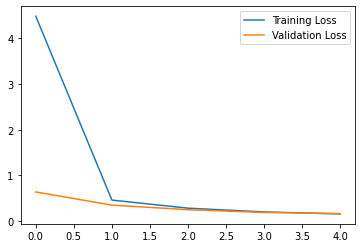

In [26]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## 2 Convolutional layers

In [27]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 94us/step - loss: 2.0946 - accuracy: 0.8046 - val_loss: 0.1386 - val_accuracy: 0.9588
Epoch 2/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.0901 - accuracy: 0.9724 - val_loss: 0.0845 - val_accuracy: 0.9745
Epoch 3/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0813 - val_accuracy: 0.9744
Epoch 4/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.0300 - accuracy: 0.9911 - val_loss: 0.0817 - val_accuracy: 0.9767
Epoch 5/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.0808 - val_accuracy: 0.9778


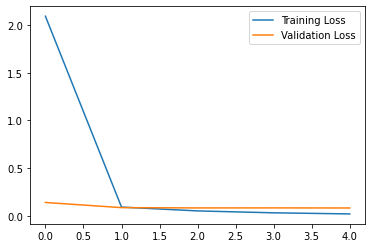

In [29]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## 7 Convolutional layers

### Deeper networks tend to generalise better

In [30]:
num_classes = 10

model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
# model.add(Conv2D(16, (3, 3), activation='relu'))
# model.add(Conv2D(8, (3, 3), activation='relu'))
# model.add(Conv2D(8, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 128)       3328      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 128)       409728    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        204864    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        102464    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 32)          25632     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 16)         

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 22s 460us/step - loss: 1.9556 - accuracy: 0.3242 - val_loss: 1.0683 - val_accuracy: 0.6424
Epoch 2/5
48000/48000 [==============================] - 17s 364us/step - loss: 0.4876 - accuracy: 0.8477 - val_loss: 0.2224 - val_accuracy: 0.9375
Epoch 3/5
48000/48000 [==============================] - 17s 363us/step - loss: 0.1608 - accuracy: 0.9518 - val_loss: 0.1304 - val_accuracy: 0.9637
Epoch 4/5
48000/48000 [==============================] - 17s 363us/step - loss: 0.1010 - accuracy: 0.9697 - val_loss: 0.1017 - val_accuracy: 0.9715
Epoch 5/5
48000/48000 [==============================] - 17s 363us/step - loss: 0.0755 - accuracy: 0.9774 - val_loss: 0.0893 - val_accuracy: 0.9739


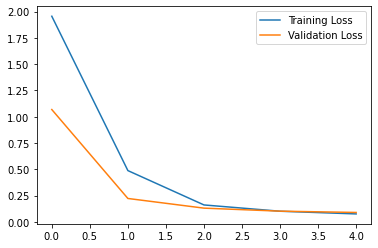

In [32]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## Dropout layers
Use small dropout values:
 - 20-50%<br>
 
Can be used on the visible and hidden layers
 
 #### Discuss:
 How does the shape of our data change after applying a dropout layer?

In [33]:
#create model
model = Sequential()

#add model layers
model.add(Dropout(0.2, input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)         

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 68us/step - loss: 7.1121 - accuracy: 0.3848 - val_loss: 1.1798 - val_accuracy: 0.6565
Epoch 2/5
48000/48000 [==============================] - 3s 58us/step - loss: 1.0556 - accuracy: 0.6771 - val_loss: 0.6200 - val_accuracy: 0.8362
Epoch 3/5
48000/48000 [==============================] - 3s 58us/step - loss: 0.6992 - accuracy: 0.7875 - val_loss: 0.3893 - val_accuracy: 0.8939
Epoch 4/5
48000/48000 [==============================] - 3s 58us/step - loss: 0.5285 - accuracy: 0.8397 - val_loss: 0.2886 - val_accuracy: 0.9208
Epoch 5/5
48000/48000 [==============================] - 3s 58us/step - loss: 0.4403 - accuracy: 0.8682 - val_loss: 0.2436 - val_accuracy: 0.9337


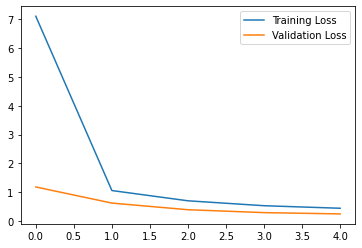

In [35]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Pre-trained NNs

In [40]:
from keras.preprocessing import image

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

![elephant](elephant.jpg)

In [66]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

basemodel = ResNet50(weights='imagenet')

In [58]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01871265', 'tusker', 0.6489367), ('n02504458', 'African_elephant', 0.31101304), ('n02504013', 'Indian_elephant', 0.037387162)]


In [67]:
basemodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### We want to eliminate the last (dense) layer

In [68]:
basemodel.layers.pop()

In [72]:
basemodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### We want to keep constant our pre-trained network

In [69]:
for layer in basemodel.layers:
    layer.trainable = False

### We want to add our own layers on top

In [70]:
model = Sequential()
model.add(basemodel)
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation="softmax"))

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              23587712  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 24,105,354
Trainable params: 517,642
Non-trainable params: 23,587,712
_________________________________________________________________


In [81]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2,random_state=seed)

In [110]:
desiredX = desiredY = 224
padded_images = []

padded_images

for img in X_train:
    shape = img.shape
    xDiff = desiredX - shape[0]
    xLeft = xDiff//2
    xRight = xDiff-xLeft

    yDiff = desiredY - shape[1]
    yLeft = yDiff//2
    yRight = yDiff - yLeft

    padded_images.append(np.pad(img,((xLeft,xRight),(yLeft,yRight),(0,0)), mode='constant'))
         #or choose another mode

X_train = np.asarray(padded_images) #this can go into the model

In [106]:
desiredX = desiredY = 224
padded_images = []

padded_images

for img in X_val:
    shape = img.shape
    xDiff = desiredX - shape[0]
    xLeft = xDiff//2
    xRight = xDiff-xLeft

    yDiff = desiredY - shape[1]
    yLeft = yDiff//2
    yRight = yDiff - yLeft

    padded_images.append(np.pad(img,((xLeft,xRight),(yLeft,yRight),(0,0)), mode='constant'))
         #or choose another mode

X_val = np.asarray(padded_images) #this can go into the model

In [107]:
desiredX = desiredY = 224
padded_images = []

padded_images

for img in X_test:
    shape = img.shape
    xDiff = desiredX - shape[0]
    xLeft = xDiff//2
    xRight = xDiff-xLeft

    yDiff = desiredY - shape[1]
    yLeft = yDiff//2
    yRight = yDiff - yLeft

    padded_images.append(np.pad(img,((xLeft,xRight),(yLeft,yRight),(0,0)), mode='constant'))
         #or choose another mode

X_test = np.asarray(padded_images) #this can go into the model

In [111]:
X_train.shape

(40000, 224, 224, 3)

In [115]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [116]:
y_train.shape

(40000, 10)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=5, verbose=1, batch_size=1000)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5


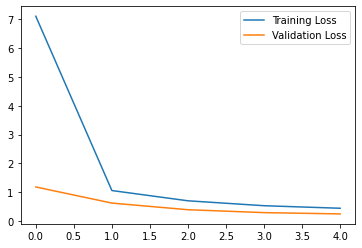

In [35]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()